Архитектуры нейронных сетей:

         1 часть https://habr.com/ru/company/wunderfund/blog/313696/

         2 часть https://habr.com/ru/company/wunderfund/blog/313906/

Новые архитектуры нейросетей https://habr.com/ru/post/498168/

Этапы разработки модели нейронной сети.
1.   Определение обучающих данных.
2.   Определение архитектуры модели нейронной сети (кол-во и тип слоев, кол-во нейронов в каждом слое, тип активационной функции для каждого слоя).
1.   Инициализация весов нейронной сети.
2.   Настройка процесса обучения (выбор функции потерь, оптимизатора, параметров оценки).
1.   Обучение модели.
2.   Оценка модели.
1.   Настройка гиперпараметров.











Формирование архитектуры в Keras:
*   Последовательная модель с использованием класса Sequential.
*   Модель функционального API.



Компиляция модели нейронной сети - это процесс настройки модели для обучения. При компиляции модели определяются следующие параметры:

1. Функция потерь (loss function) - определяет, какая мера будет использоваться для оценки ошибки модели во время обучения.
2. Оптимизатор (optimizer) - определяет алгоритм, который будет использоваться для обновления весов модели на основе градиентов функции потерь.
3. Метрики (metrics) - определяют, какие метрики будут использоваться для оценки производительности модели во время обучения и тестирования.

Слои:
1. Input - слой для определения входных данных модели
2. Dense - полносвязный слой
3. Conv2D - сверточный слой
4. MaxPooling2D - слой пулинга
5. Dropout - слой для регуляризации
6. Flatten - слой для преобразования многомерного массива в одномерный
7. LSTM - рекуррентный слой
8. BatchNormalization - слой для нормализации активаций
9. Activation - слой для применения активационной функции
10. Embedding - слой для работы с векторным представлением слов
11. GlobalAveragePooling2D - слой для усреднения признаков по всем пикселям изображения.

Функции активации:
1. relu - выпрямленная функция линейной активации (Rectified Linear Unit)
2. sigmoid - сигмоидальная функция
3. tanh - гиперболический тангенс
4. softmax - функция активации Softmax, используемая для многоклассовой классификации
5. linear - линейная функция, возвращающая входное значение
6. elu - exponential linear unit (экспоненциальная линейная функция)
7. selu - scaled exponential linear unit (масштабированная экспоненциальная линейная функция)
8. softplus - функция активации softplus
9. softsign - функция активации softsign
10. hard_sigmoid - функция активации hard sigmoid
11. LeakyReLU - нелинейность ReLU
12. PReLU - параметрический ReLU
13. ThresholdedReLU - пороговая ReLU
14. ReLU6 - ReLU6, ограниченная ReLU

Функции активации последнего слоя:
*   Бинарная классификация - sigmoid.
*   Многоклассовая классификация - softmax.
*   Регрессия - linear, ReLU, tanh, sigmoid.

Функция потерь:
*   Бинарная классификация - бинарная кросс-энтропия (binary_crossentropy).
*   Многоклассовая классификация - категориальная кросс-энтропия (categorical_crossentropy).
*   Регрессия - среднеквадратическая ошибка (mse).

Смещение (bias neuron) use_bias

Выбор функции активации и функции потерь зависит от задачи и данных.   







Аугментация данных - увеличение даных в обучающей выборке за счет преобразования и модификации исходных данных. Например, с использованием ImageDataGenerator.

Полносвязная модель нейронной сети (fully connected neural network) - это тип нейронной сети, в которой каждый нейрон в одном слое связан с каждым нейроном в следующем слое.

model = Sequential()

model.add(Dense(800, input_dim=784, activation='relu'))

model.add(Dense(200, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [143]:
#Распознавание рукописных цифр
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils
from keras.preprocessing import image
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.utils import plot_model

import numpy as np # linear algebra
import matplotlib.pyplot as plt
from PIL import Image


In [144]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [145]:
X_train.shape

(60000, 28, 28)

In [146]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

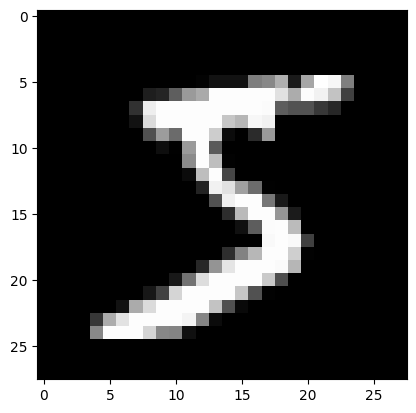

In [147]:
plt.imshow(Image.fromarray(X_train[0]).convert('RGBA'))
plt.show()

In [148]:
y_train[0]

5

In [149]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_train = X_train / 255
X_test = X_test.astype('float32')
X_test = X_test / 255

In [150]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [151]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [152]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Добавляем глобальное среднее пулинг-слой для сведения пространственных размеров
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Добавляем полносвязный слой с 10 нейронами и функцией активации softmax
x = Dense(10, activation='softmax')(x)

# Создаем модель, используя вход base_model и выход последнего добавленного слоя
model = Model(inputs=base_model.input, outputs=x)

# Замораживаем веса предварительно обученной модели ResNet50, чтобы обучать только добавленные слои
for layer in base_model.layers:
    layer.trainable = False

# Показываем архитектуру модели
model.summary()


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_8[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [153]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [154]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Генерируем данные для тренировки и валидации в реальном времени
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)




In [155]:
train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical')

# Тренируем модель
history = model.fit(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=50,
        verbose=2)


FileNotFoundError: [Errno 2] No such file or directory: 'data/train'

In [136]:
# Оцениваем модель на тестовых данных
test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
        shuffle=False)

model.evaluate(test_generator, verbose=1)

ValueError: Exception encountered when calling Functional.call().

[1mInvalid input shape for input Tensor("IteratorGetNext:0", shape=(None, 784), dtype=float32). Expected shape (None, None, None, 3), but input has incompatible shape (None, 784)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(None, 784), dtype=float32)
  • training=False
  • mask=None

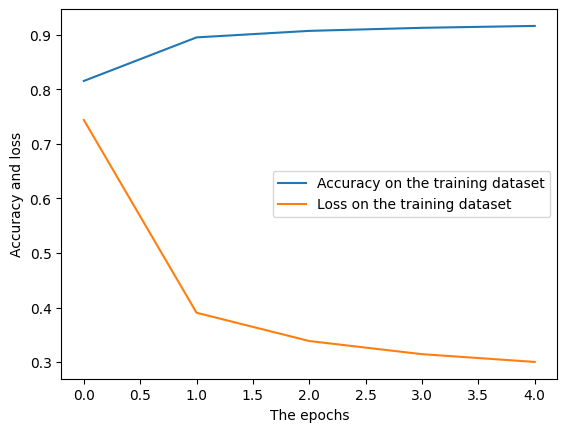

In [137]:
plt.plot(history.history['accuracy'], label='Accuracy on the training dataset')
plt.plot(history.history['loss'], label='Loss on the training dataset')
plt.xlabel('The epochs')
plt.ylabel('Accuracy and loss')
plt.legend()
plt.show()

In [138]:
x = X_test[0]

In [139]:
x.shape

(784,)

In [140]:
x = np.expand_dims(x, axis=0)

In [141]:
x.shape

(1, 784)

In [142]:
model.predict(x)

ValueError: Exception encountered when calling Functional.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1, 784), dtype=float32). Expected shape (None, None, None, 3), but input has incompatible shape (1, 784)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(1, 784), dtype=float32)
  • training=False
  • mask=None

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
img_path = '111.png'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

In [ ]:
plt.imshow(img.convert('RGBA'))
plt.show()

In [ ]:
x = image.img_to_array(img)
x = x.reshape(1, 784)
x /= 255

In [ ]:
x.shape

In [ ]:
model.predict(x)

In [ ]:
#Предсказание стоимости недвижимости
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.regularizers import l1, l2, l1_l2
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
#from scipy.misc import toimage
%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [ ]:
type(x_train)

In [ ]:
x_train.shape

In [ ]:
#Нормализация данных
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
#model.add(BatchNormalization())
#model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.01)))
#model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(1)) # если допускаются отрицательные значения
model.add(Dense(1, activation='relu'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(x_train, y_train, epochs=200, validation_split=0.1, verbose=2)

In [ ]:
model.evaluate(x_test, y_test, verbose=1)

In [ ]:
plt.plot(history.history['mae'], # mean_absolute_error
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], # val_mean_absolute_error
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(x_test)
pred.flatten()

In [ ]:
plt.scatter(y_test, pred)
plt.xlabel('Правильные значение, $1K')
plt.ylabel('Предсказания, $1K')
plt.axis('equal')
plt.axis('square')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

In [ ]:
error = pred - y_test
plt.hist(error, bins = 50)
plt.xlabel("Значение ошибки, $1K")
plt.ylabel("Количество")
plt.show()